![alt text](plate_hole.png "Plate with Hole")

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import math

In [18]:
L = 0.1
h = 0.05
r = 0.02

nb_element = 20

#1-1 Create Nodes
#Nodes = np.array([[0,0],[0,1],[1,0],[1,1]])

Nodes = []

for x in np.linspace(0, L, num=nb_element):
    if(x<r):
        y0 = math.sqrt(r**2-x**2)
        for y in np.linspace(y0, h, num=nb_element):
            Nodes.append([x,y])
            
    else:
        for y in np.linspace(0, h, num=nb_element):
            Nodes.append([x,y])

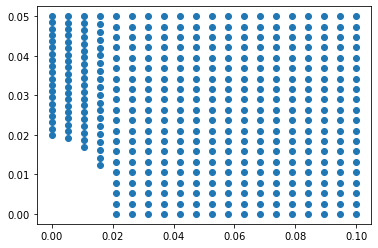

In [19]:
#1-2 Display Nodes

points = np.array(Nodes)

plt.plot(points[:,0],points[:,1],'o')
plt.show()

In [20]:
#2- Create Elements
from scipy.spatial import Delaunay
tri = Delaunay(points)


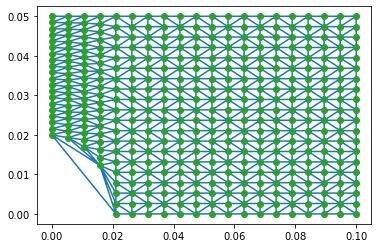

In [22]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [23]:
tri.simplices

array([[ 80,  60,   0],
       [ 30,  31,  10],
       [ 51,  30,  50],
       ...,
       [108,  89,  88],
       [107, 108,  87],
       [ 87, 108,  88]], dtype=int32)

In [24]:
#Create a set of points on a circle of diameter 0.0195
p = []
r2=0.0195
for x in np.linspace(0,r2,10):
    p.append([x,math.sqrt(r2**2-x**2)])

#Find the elements which contain those points
tri.find_simplex(p)

array([ -1, 154, 154, 154, 153, 153, 153,   0,  21,  -1], dtype=int32)

In [25]:
#Create a new set of elements without the problematic elements
mesh = np.delete(tri.simplices,[0,153,154,21],0)

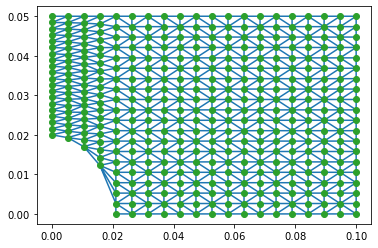

In [26]:
plt.triplot(points[:,0], points[:,1], mesh)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [44]:
#3- Export into a file
nb_nodes = len(points)
nb_elements = len(mesh)

file = open("plate_mesh.dat","w")
file.write("{} {}\n".format(nb_nodes,nb_elements))
for i,node in enumerate(Nodes):
    file.write("{} {} {}\n".format(i,node[0],node[1])) 
for j,elem in enumerate(mesh):
    file.write("{} {} {} {}\n".format(j,elem[0],elem[1],elem[2]))
file.close()

In [42]:
nb_nodes = len(points)
nb_elements = len(mesh)

for j,elem in enumerate(mesh):
    print("{} {} {} {}\n".format(j,elem[0],elem[1],elem[2]))

0 30 31 10

1 51 30 50

2 30 51 31

3 60 82 83

4 5 4 25

5 2 23 3

6 31 11 10

7 58 37 57

8 78 58 57

9 13 34 14

10 51 52 31

11 53 52 73

12 34 54 55

13 9 30 10

14 26 5 25

15 46 26 25

16 48 49 28

17 94 95 73

18 58 79 59

19 79 58 78

20 81 82 60

21 60 61 40

22 61 62 40

23 62 63 40

24 65 42 64

25 42 65 43

26 88 65 64

27 65 44 43

28 44 65 66

29 89 65 88

30 65 89 66

31 41 20 40

32 41 42 20

33 63 41 40

34 42 41 64

35 41 63 64

36 44 22 43

37 22 44 23

38 1 22 2

39 22 23 2

40 24 46 25

41 4 24 25

42 24 4 3

43 23 24 3

44 18 39 19

45 37 36 57

46 16 36 37

47 33 13 12

48 33 34 13

49 54 33 53

50 33 54 34

51 9 29 30

52 30 29 50

53 29 49 50

54 49 29 28

55 8 7 28

56 29 8 28

57 8 29 9

58 26 6 5

59 7 27 28

60 27 48 28

61 6 27 7

62 27 6 26

63 76 56 55

64 36 56 57

65 77 78 57

66 56 77 57

67 77 56 76

68 77 98 78

69 74 53 73

70 74 54 53

71 74 95 96

72 95 74 73

73 97 76 96

74 97 77 76

75 77 97 98

76 99 79 78

77 98 99 78

78 85 61 60

79 45 44